In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
#Loading the NPZ file
data = np.load('C:/Users/zerox/Desktop/ML20019229/Datasets/pathmnist.npz')
print(data.keys()) #Get keys of the dataset

#split data
X_train,X_val,X_test = data['train_images'],data['val_images'],data['test_images']
y_train,y_val,y_test = data['train_labels'].flatten(),data['val_labels'].flatten(),data['test_labels'].flatten()

#Normalizing
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

y_train_one_hot = to_categorical(y_train, num_classes=9)
y_val_one_hot = to_categorical(y_val, num_classes=9)
y_test_one_hot = to_categorical(y_test, num_classes=9)

KeysView(NpzFile '../Datasets/pathmnist.npz' with keys: train_images, val_images, test_images, train_labels, val_labels...)


In [3]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(9, activation='softmax')
])

In [4]:
# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=3,
    restore_best_weights=True
)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_one_hot, epochs=10, batch_size = 64,
                    validation_data=(X_val, y_val_one_hot),
                   callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test,  y_test_one_hot, verbose=2)
print('\nTest accuracy:', test_acc)



Epoch 1/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.1871 - accuracy: 0.5516 - val_loss: 0.9037 - val_accuracy: 0.6431
Epoch 2/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.7871 - accuracy: 0.7101 - val_loss: 0.8325 - val_accuracy: 0.6823
Epoch 3/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.6892 - accuracy: 0.7474 - val_loss: 0.6402 - val_accuracy: 0.7652
Epoch 4/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.6291 - accuracy: 0.7703 - val_loss: 0.5819 - val_accuracy: 0.7902
Epoch 5/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.5862 - accuracy: 0.7867 - val_loss: 0.5359 - val_accuracy: 0.8053
Epoch 6/10
1407/1407 [==============================] - 12s 8ms/step - loss: 0.5496 - accuracy: 0.7994 - val_loss: 0.5970 - val_accuracy: 0.7853
Epoch 7/10
1407/1407 [==============================] - 12s 9ms/step - loss: 0.5054 - accuracy: 0.8147 - val_loss: 0.6310 - val_ac

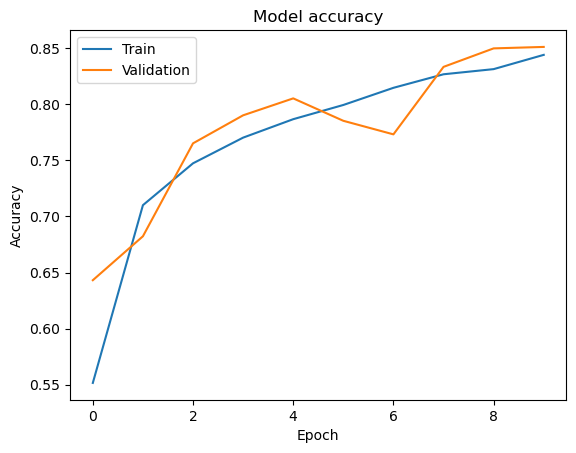

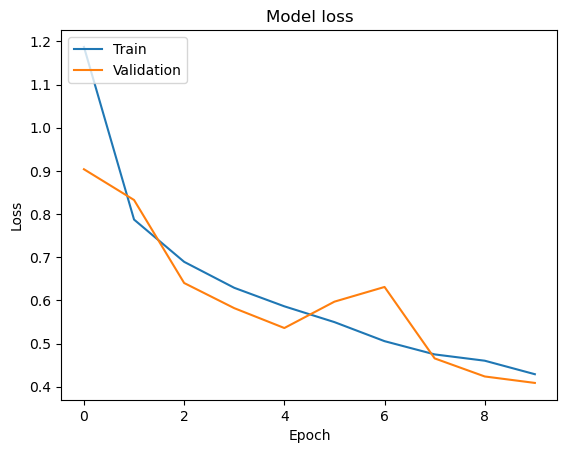

In [5]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

225/225 [==============================] - 0s 2ms/step


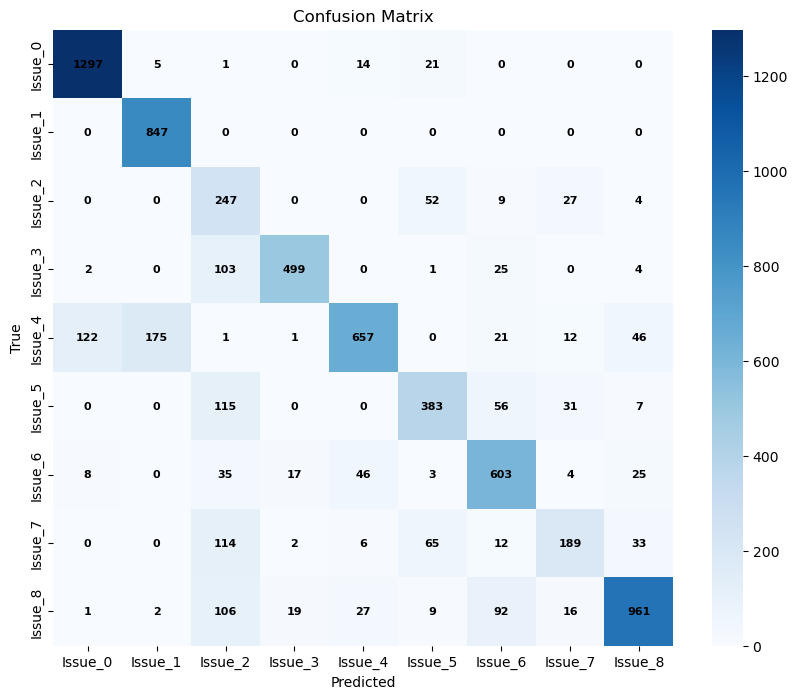

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1338
           1       0.82      1.00      0.90       847
           2       0.34      0.73      0.47       339
           3       0.93      0.79      0.85       634
           4       0.88      0.63      0.74      1035
           5       0.72      0.65      0.68       592
           6       0.74      0.81      0.77       741
           7       0.68      0.45      0.54       421
           8       0.89      0.78      0.83      1233

    accuracy                           0.79      7180
   macro avg       0.77      0.76      0.75      7180
weighted avg       0.82      0.79      0.79      7180



In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tabulate import tabulate


# Predict the results
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Custom labels for the issues
issue_labels = ['Issue_0', 'Issue_1', 'Issue_2', 'Issue_3', 'Issue_4', 'Issue_5', 'Issue_6', 'Issue_7', 'Issue_8']

# Convert confusion matrix to logarithmic scale to handle wide value ranges
cm_log_scale = np.log1p(cm)  # log1p is used to handle zero values in the matrix

plt.figure(figsize=(10,8))
sns.heatmap(cm, fmt='d', cmap='Blues', xticklabels=issue_labels, yticklabels=issue_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Annotate each cell with the actual values from 'cm'
for i in range(cm_log_scale.shape[0]):
    for j in range(cm_log_scale.shape[1]):
        plt.text(j+0.5, i+0.5, cm[i, j], 
                 fontdict={'fontsize':8, 'weight':'bold', 'color':'black'},
                 ha='center', va='center')

plt.show()

# Classification Report
report = classification_report(y_test, y_pred_classes, digits=2)
    
# Classification Report
print(classification_report(y_test, y_pred_classes))


In [7]:
model.save('PathMNIST.h5')